In [1]:
%matplotlib inline
import pandas as pd

In [2]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,Kenkoku no kane,1928
1,Vsyo nachinayetsya s lyubvi,1984
2,Expendable Assets,2016
3,Stardust Serenade,2006
4,Only One Way to Kill a Zombie,2010


In [3]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [4]:
super_bat = cast[(cast.character == 'Superman') | (cast.character == 'Batman')].groupby(['year', 'character']).size().unstack()

In [5]:
super_bat = super_bat.fillna(0)

In [6]:
super_bat[(super_bat.Superman > super_bat.Batman)].shape[0]

11

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [7]:
super_bat[super_bat.Batman > super_bat.Superman].shape[0]

27

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

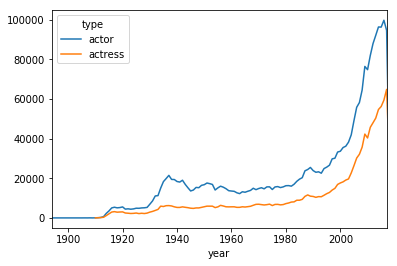

In [8]:
cast.groupby(['year', 'type']).size().unstack().plot(xlim=(1894, 2017))

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

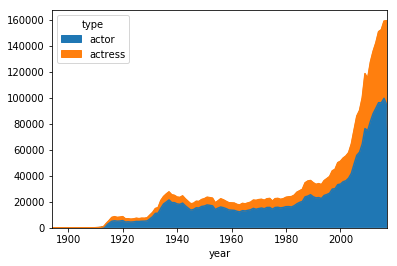

In [9]:
cast.groupby(['year', 'type']).size().unstack().plot(xlim=(1894, 2017), kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

In [10]:
cast_type = cast.groupby(['year', 'type']).size().unstack()

In [11]:
cast_type = cast_type.fillna(0)

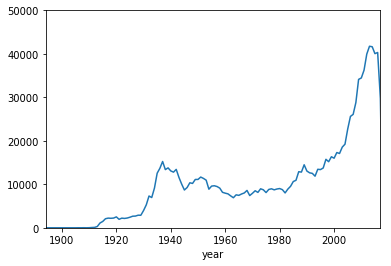

In [12]:
(cast_type['actor'] - cast_type['actress']).plot(xlim=(1894, 2017), ylim=(0,50000))

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

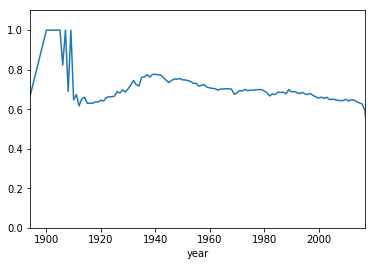

In [13]:
(cast_type['actor'] / (cast_type['actor'] + cast_type['actress'])).plot(xlim=(1894, 2017), ylim=(0,1.1))

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

In [14]:
cast_n_2 = cast[cast.n == 2]
cast_type_n_2 = cast_n_2.groupby(['year', 'type']).size().unstack()

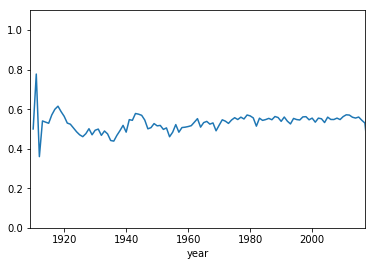

In [15]:
(cast_type_n_2['actor'] / (cast_type_n_2['actor'] + cast_type_n_2['actress'])).plot(xlim=(1909, 2017), ylim=(0,1.1))

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

In [16]:
cast_n = cast[cast.n <=3]
cast_type_n = cast_n.groupby(['n', 'year', 'type']).size().unstack('type')

In [17]:
cast_type_n = cast_type_n.fillna(0)
cast_type_n = cast_type_n.unstack('n')

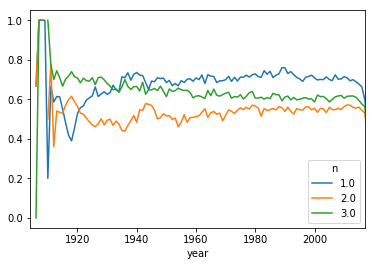

In [18]:
(cast_type_n['actor'] / (cast_type_n['actor'] + cast_type_n['actress'])).plot(label='n', xlim=(1904, 2017))